In [1]:
from pyimagesearch.shapedetector import ShapeDetector
import argparse
import imutils
import cv2
import os

In [2]:
## construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to the input image")
#args = vars(ap.parse_args())

In [3]:
main = os.getcwd()

In [4]:
path1 = main+'/test_images/image_2.png'

In [5]:
image = cv2.imread(path1)
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()

In [6]:
# loop over the contours
for c in cnts:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = sd.detect(c)
	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)
	# show the output image
	#cv2.imshow("Image", image)
	#cv2.waitKey(0)

In [7]:
#cv2.imshow("Image", image)

In [8]:
import matplotlib.pyplot as plt

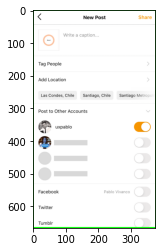

In [9]:
plt.imshow(image)

### Intentando una serie de preprocesamientos antes de aplicar el algoritmo: Segmentando via colores más dominantes.

In [10]:
image = cv2.imread(path1)

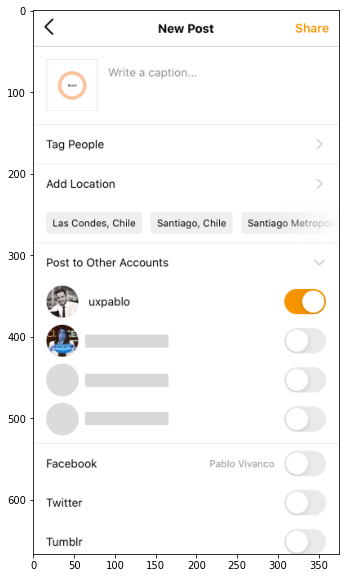

In [11]:
plt.figure(figsize=(12,10))
plt.imshow(image)

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [13]:
image.shape

(667, 375, 3)

In [14]:
all_pixels = image.reshape((-1,3))

In [15]:
print(all_pixels.shape)

(250125, 3)


In [16]:
dominant_colors = 5

In [17]:
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=5)

In [18]:
centers = km.cluster_centers_

In [19]:
centers = np.array(centers,dtype='uint8')

[254 254 254]
[135 140 147]
[42 37 35]
[243 151   9]
[227 226 225]


<function matplotlib.pyplot.show(*args, **kw)>

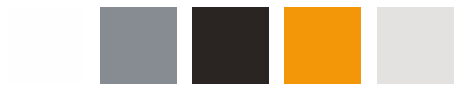

In [20]:
i = 1
plt.figure(0,figsize = (8,2))
colors = []
for each_col in centers:
    plt.subplot(1,5,i)
    plt.axis(False)
    i += 1
    colors.append(each_col)
    print(each_col)
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show

In [21]:
new_img = np.zeros((image.shape[0]*image.shape[1],3),dtype='uint8')
print(new_img.shape)

(250125, 3)


In [22]:
colors

[array([254, 254, 254], dtype=uint8),
 array([135, 140, 147], dtype=uint8),
 array([42, 37, 35], dtype=uint8),
 array([243, 151,   9], dtype=uint8),
 array([227, 226, 225], dtype=uint8)]

In [23]:
km.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [24]:
np.unique(km.labels_)

array([0, 1, 2, 3, 4], dtype=int32)

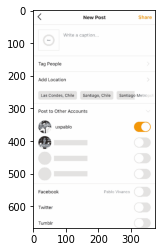

In [25]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape((image.shape))
plt.imshow(new_img)
plt.show()

In [26]:
from array import array

In [27]:
centers = [np.array([252, 231, 231], dtype=np.uint8),
 np.array([128, 122, 122], dtype=np.uint8),
 np.array([160, 238, 180], dtype=np.uint8),
 np.array([160, 206, 238], dtype=np.uint8),
 np.array([243, 151,   9], dtype=np.uint8)]

<function matplotlib.pyplot.show(*args, **kw)>

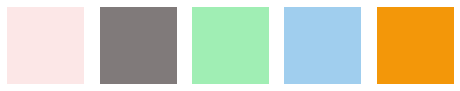

In [28]:
i = 1
plt.figure(0,figsize = (8,2))
colors = []
for each_col in centers:
    plt.subplot(1,5,i)
    plt.axis(False)
    i += 1
    colors.append(each_col)
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
    
plt.show

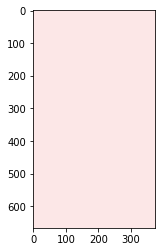

In [29]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape((image.shape))
plt.imshow(new_img)
plt.show()